# 🚢 Titanic Survival Prediction: Giới thiệu Bài toán & Phân tích Dữ liệu Khám phá (EDA) Chuyên sâu

**Mục tiêu:** Thực hiện EDA chuyên sâu để hiểu sâu sắc các mối tương quan giữa đặc trưng và biến mục tiêu, từ đó xây dựng chiến lược tiền xử lý dữ liệu hiệu quả nhất.

---

## 1. Giới thiệu Bài toán và Đặc trưng Dữ liệu

### 1.1. Bối cảnh & Mục tiêu

Cuộc thi **"Titanic - Machine Learning from Disaster"** là bài toán phân loại nhị phân kinh điển, thách thức người tham gia xây dựng mô hình dự đoán khả năng sống sót ($\text{Survived}=1$) dựa trên dữ liệu hành khách. Thảm họa này nhấn mạnh một nguyên tắc sinh tồn cơ bản: **cơ hội sống sót không đồng đều**, mà bị chi phối bởi các yếu tố xã hội và nhân khẩu học.


### 1.2. Đặc trưng Đầu vào (Features)

| Biến (Variable) | Loại dữ liệu | Định nghĩa | Ghi chú & Ý nghĩa |
| :--- | :--- | :--- | :--- |
| **PassengerId** | Định danh | ID duy nhất. | Không có ý nghĩa dự đoán. |
| **Survived** | Mục tiêu | Trạng thái sống sót. | $1 = \text{Sống sót}, 0 = \text{Tử vong}$. |
| **Pclass** | Định tính (Thứ tự) | Hạng vé. | Proxy cho **Địa vị Kinh tế-Xã hội (SES)**: $1=\text{Upper}, 3=\text{Lower}$. |
| **Sex** | Định tính | Giới tính. | **Đặc trưng dự đoán mạnh mẽ nhất**. |
| **Age** | Định lượng | Tuổi của hành khách. | **Có giá trị thiếu**. Tuổi có thể là số thập phân. |
| **SibSp** | Định lượng | Số lượng Anh chị em/Vợ chồng đi cùng. | |
| **Parch** | Định lượng | Số lượng Cha mẹ/Con cái đi cùng. | |
| **Fare** | Định lượng | Giá vé hành khách trả. | Tương quan mạnh với Pclass. |
| **Cabin** | Định tính | Số hiệu Cabin. | **Thiếu rất nhiều** ($\approx 77\%$). Chữ cái đầu là vị trí boong tàu. |
| **Embarked** | Định tính | Cổng lên tàu. | $C = \text{Cherbourg}, Q = \text{Queenstown}, S = \text{Southampton}$. |

## 2. Thiết lập Môi trường và Tổng quan Dữ liệu

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

### Thiết lập hiển thị cho Notebook

In [ ]:
pd.set_option('display.max_columns', 15)
sns.set_style('whitegrid')
%matplotlib inline

### Tải dữ liệu

In [ ]:
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("Tải dữ liệu thành công.")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file dữ liệu. Hãy đảm bảo 'train.csv' nằm trong cùng thư mục với notebook.")

Tải dữ liệu thành công.


### Kiểm tra 5 dòng đầu tiên của tập huấn luyện

In [ ]:
print('--- 5 Dòng đầu tiên của tập huấn luyện ---')
print(train_df.head())

--- 5 Dòng đầu tiên của tập huấn luyện ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

### Thông tin kiểu dữ liệu và giá trị thiếu

In [ ]:
print("\n--- Thông tin kiểu dữ liệu và giá trị thiếu trong tập huấn luyện ---")
train_df.info()


--- Thông tin kiểu dữ liệu và giá trị thiếu trong tập huấn luyện ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Kiểm tra tổng số giá trị thiếu (NaN) trên tập huấn luyện

In [ ]:
print("\n--- Tổng số giá trị thiếu (NaN) trên tập huấn luyện ---")
print(train_df.isnull().sum())


--- Tổng số giá trị thiếu (NaN) trên tập huấn luyện ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Nhận xét Tổng quan và Vấn đề Dữ liệu:**

Tập huấn luyện (`train.csv`) bao gồm 891 mẫu. Phân tích `info()` và `isnull().sum()` chỉ ra ba cột chính có vấn đề về dữ liệu thiếu:

1.  **`Cabin` (687/891 thiếu):** Với hơn **77%** giá trị bị thiếu, việc điền khuyết số hiệu Cabin cụ thể là không thực tế. Chiến lược phù hợp là chuyển đổi nó thành một biến nhị phân (`Cabin_Known`) để chỉ ra hành khách có thông tin Cabin hay không, vì thông tin Cabin thường liên quan đến vị trí trên tàu và tầng lớp xã hội.
2.  **`Age` (177/891 thiếu):** Đây là một cột quan trọng và không thể bị loại bỏ. Việc điền khuyết cần phải thông minh hơn, ví dụ sử dụng **trung vị** theo nhóm `Pclass` hoặc `Title` (Danh xưng), thay vì trung bình toàn bộ, để bảo toàn mối quan hệ phân bố tuổi-xã hội.
3.  **`Embarked` (2/891 thiếu):** Chỉ thiếu 2 giá trị, có thể dễ dàng điền bằng giá trị **mode** (cổng lên tàu xuất hiện nhiều nhất) mà không gây ảnh hưởng đáng kể đến mô hình.

## 3. Phân tích Dữ liệu Khám phá (EDA)

### 3.1. Phân tích Biến Mục tiêu (`Survived`)

#### Tỷ lệ sống sót chung

In [ ]:
survival_rate = train_df['Survived'].mean()
print(f"Tỷ lệ sống sót chung: {survival_rate:.2%}")

Tỷ lệ sống sót chung: 38.38%


**Nhận xét về Phân bố Sống sót:**

Tỷ lệ sống sót chung trong tập dữ liệu là **38.38%**, cho thấy số lượng hành khách tử vong ($61.62\%$) nhiều hơn đáng kể. Mối quan hệ không cân bằng này là điều cần lưu ý. Mục tiêu của mô hình không chỉ là dự đoán chính xác mà còn là tránh thiên vị (bias) quá mức về lớp đa số (tử vong), mặc dù trong bài toán này, độ chính xác (Accuracy) vẫn là thước đo chính của Kaggle.

### 3.2. Mối quan hệ giữa Sống sót, Giới tính và Hạng vé

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_34460\1248636244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, palette='coolwarm')


Text(0, 0.5, 'Tỷ lệ Sống sót')

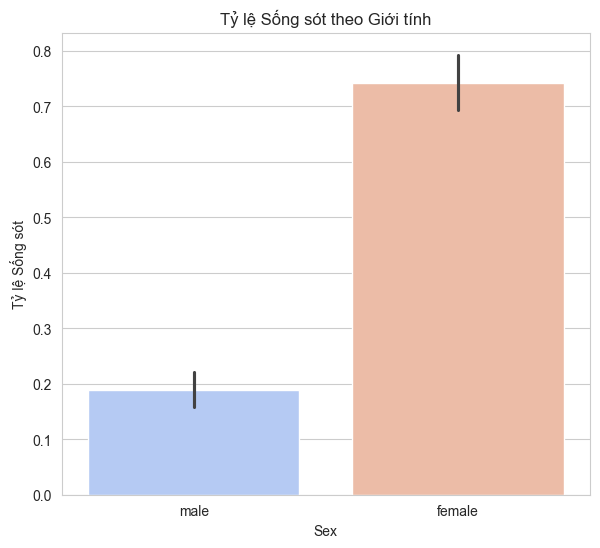

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Survived', data=train_df, palette='coolwarm')
plt.title('Tỷ lệ Sống sót theo Giới tính')
plt.ylabel('Tỷ lệ Sống sót')

**Tương tác:** Phân tích tương tác cho thấy **cả hai yếu tố đều quan trọng**. Ngay cả khi có đặc quyền về giới tính, nếu một người phụ nữ ở Hạng ba, tỷ lệ sống sót của họ vẫn thấp hơn đáng kể so với một người phụ nữ ở Hạng nhất. Điều này cho thấy **vị trí và tầng lớp xã hội** có ảnh hưởng đến mức độ ưu tiên sơ tán, ngay cả trong cùng một nhóm giới tính.

### 3.3. Phân tích Tuổi tác (`Age`)

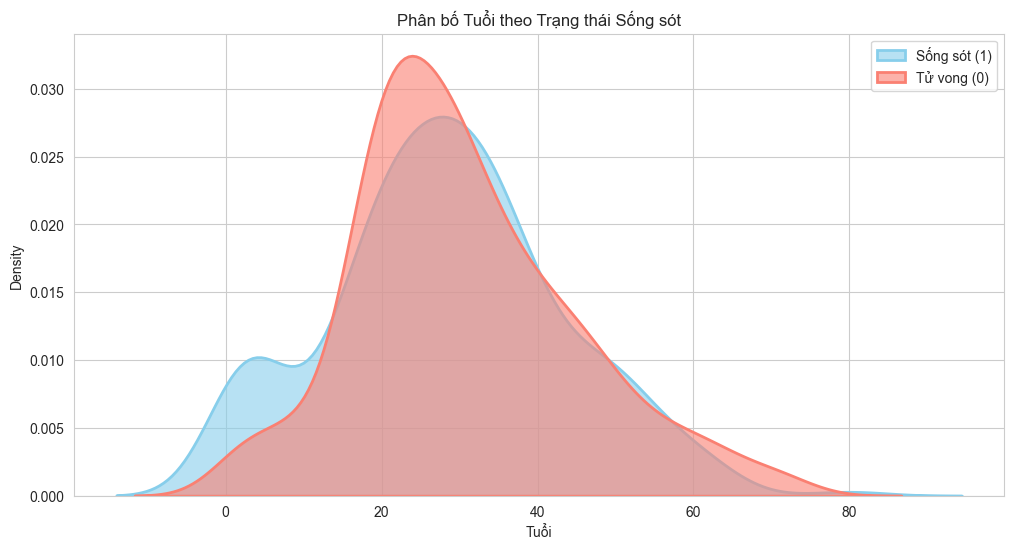

In [ ]:
plt.figure(figsize=(12, 6))
# Biểu đồ mật độ (KDE) để so sánh phân bố Tuổi giữa hai nhóm
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'].dropna(), label='Sống sót (1)', color='skyblue', fill=True, alpha=0.6, linewidth=2)
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'].dropna(), label='Tử vong (0)', color='salmon', fill=True, alpha=0.6, linewidth=2)
plt.title('Phân bố Tuổi theo Trạng thái Sống sót')
plt.xlabel('Tuổi')
plt.legend()
plt.show()

**Nhận xét và Giải thích về `Age`:**

Biểu đồ phân bố tuổi chỉ ra một sự khác biệt rõ rệt: **Trẻ em (dưới 10 tuổi)** có đỉnh sống sót cao hơn hẳn, điều này hoàn toàn phù hợp với chính sách "trẻ em trước" đã được áp dụng. Ngược lại, đỉnh tử vong cao nhất tập trung ở nhóm tuổi **20-35**, đây là nhóm chiếm số lượng lớn nhất và chủ yếu là nam giới Hạng ba. Mối tương quan này khẳng định rằng `Age` cần được giữ lại và thậm chí được biến đổi thành các biến phân loại (ví dụ: `Child`, `Young Adult`, `Senior`) để mô hình hóa tốt hơn các ngưỡng tuổi có tỷ lệ sống sót khác nhau.

### 3.4. Phân tích Kích thước Gia đình (`SibSp` & `Parch`)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_34460\886212450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=train_df, palette='Set2')


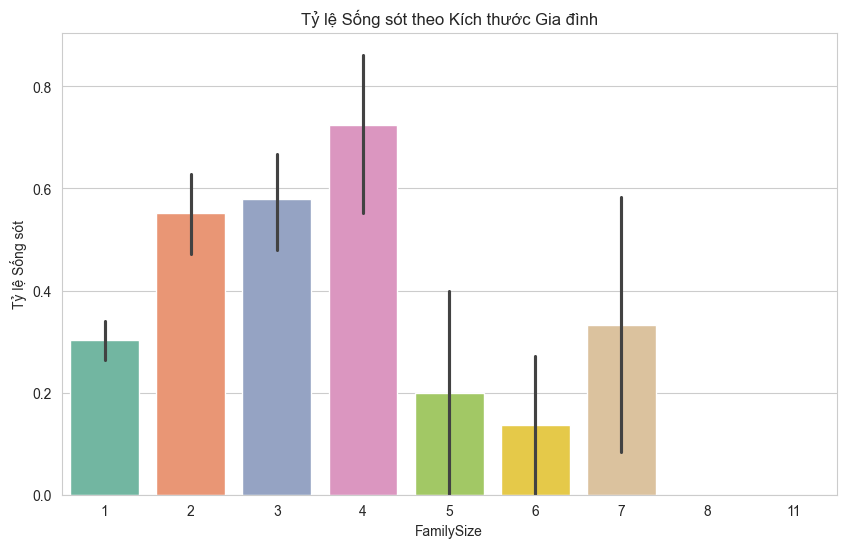

In [ ]:
# Tạo đặc trưng mới: Kích thước Gia đình (FamilySize = SibSp + Parch + bản thân)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Trực quan hóa tỷ lệ sống sót theo FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_df, palette='Set2')
plt.title('Tỷ lệ Sống sót theo Kích thước Gia đình')
plt.ylabel('Tỷ lệ Sống sót')
plt.show()

**Nhận xét và Giải thích về `FamilySize`:**

Việc kết hợp `SibSp` và `Parch` thành `FamilySize` mang lại cái nhìn sâu sắc hơn so với việc phân tích từng biến riêng lẻ.

1.  **Người đi một mình (FamilySize=1):** Có tỷ lệ sống sót thấp hơn mức trung bình. Có lẽ những người này ít được ưu tiên cứu giúp hoặc thiếu sự hỗ trợ trong hỗn loạn.
2.  **Gia đình nhỏ (FamilySize=2, 3, 4):** Nhóm này có tỷ lệ sống sót cao nhất. Điều này có ý nghĩa, vì việc sơ tán một gia đình nhỏ (ví dụ: vợ chồng, hoặc vợ chồng và một con) dễ dàng hơn, và các thành viên có động lực bảo vệ nhau.
3.  **Gia đình lớn (FamilySize $\geq 5$):** Tỷ lệ sống sót giảm mạnh. Sơ tán một gia đình quá đông đúc (ví dụ: 6, 7, 8 người) trở nên cực kỳ khó khăn trong điều kiện thiếu xuồng cứu sinh và thời gian hạn chế, dẫn đến việc phải ưu tiên cho các nhóm nhỏ hơn.

Điều này gợi ý rằng, thay vì dùng `SibSp` và `Parch`, việc tạo ra biến **`IsAlone`** (nhị phân, $1$ nếu $FamilySize=1$) hoặc phân loại `FamilySize` thành các nhóm (Nhỏ, Vừa, Lớn) sẽ mang lại sức mạnh dự đoán cao hơn cho mô hình.

## 4. Khám phá mối tương quan & hiển thị dữ liệu

Trong phần này, ta sẽ:
- Hiển thị nhanh một số thông tin dữ liệu (head, describe).
- Tính **ma trận tương quan** giữa các biến **số** (Pearson) và vẽ **heatmap** bằng matplotlib.
- Đo mức liên hệ giữa **biến mục tiêu** và:  
  - các **biến số** (tương quan Pearson với nhãn đã nhị phân hóa)  
  - các **biến phân loại** (thống kê tỉ lệ theo từng hạng mục).
- Vẽ một số biểu đồ phân phối để trực quan hóa dữ liệu.

### 4.1. Hiển thị dữ liệu & thống kê mô tả


In [ ]:
display(train_df.head(10))

print("\nThống kê mô tả (biến số):")
display(train_df.describe(include=[np.number]).T)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0



Thống kê mô tả (biến số):


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.536476,0.791503,0.00,1.0000,2.0000,2.0,2.0000



**Nhận xét:**  
- Bảng **describe** cho biết phạm vi, trung vị, độ lệch chuẩn của các biến số.  
- Với biến phân loại, xem **số hạng mục** và **mức xuất hiện thường xuyên** để nhận diện cột cần gộp/chuẩn hóa.



### 4.2. Ma trận tương quan (biến số) + Heatmap
Sử dụng hệ số tương quan **Pearson** cho các biến số (numeric).  
*Lưu ý:* Tương quan cao tuyệt đối (|r| > 0.9) có thể gợi ý đa cộng tuyến.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


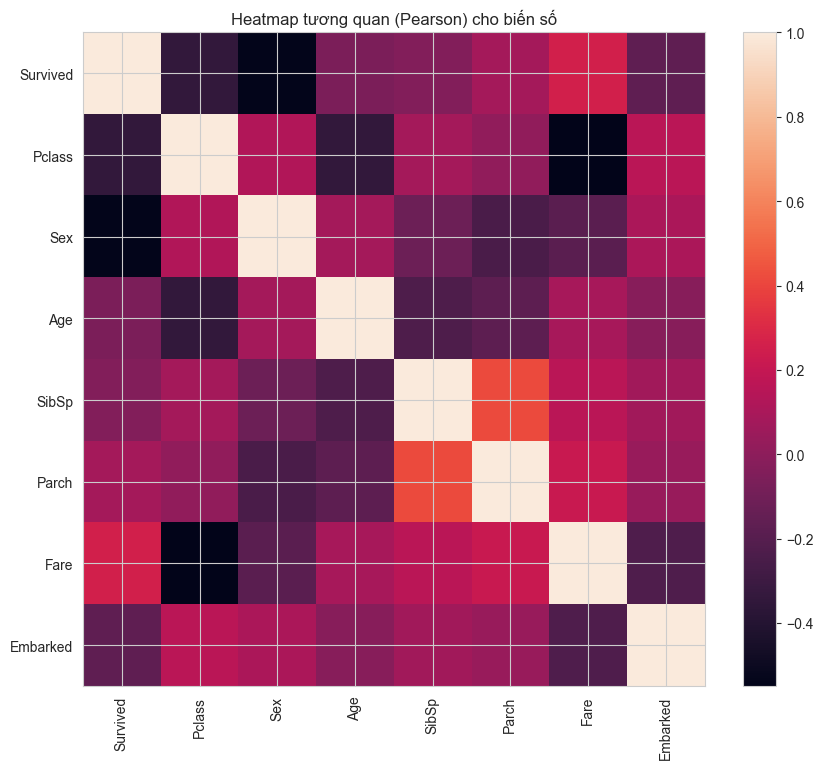

In [ ]:
numeric_df = train_df.select_dtypes(include=[np.number])
corr = numeric_df.corr(method='pearson')
display(corr)
fig, ax = plt.subplots(figsize=(min(12, 0.6*corr.shape[1]+4), min(10, 0.6*corr.shape[0]+3)))
cax = ax.imshow(corr.values, aspect='auto')
ax.set_xticks(range(corr.shape[1]))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(corr.shape[0]))
ax.set_yticklabels(corr.index)
fig.colorbar(cax)
ax.set_title("Heatmap tương quan (Pearson) cho biến số")
plt.tight_layout()
plt.show()

Từ ma trận tương quan ta có thể nhận xét như sau:

+ Sex có tương quan âm khá mạnh với Survived (-0.54), nghĩa là giới tính có ảnh hưởng lớn đến khả năng sống sót (phụ nữ thường sống sót nhiều hơn nam giới).

+ Pclass có tương quan âm với Survived (-0.33), cho thấy hành khách ở hạng vé cao có khả năng sống sót cao hơn.

+ Fare có tương quan dương với Survived (0.25), nghĩa là giá vé càng cao thì khả năng sống sót càng lớn.

+ Các biến khác như Age, SibSp, Parch, Embarked có tương quan yếu với Survived, tức là ít ảnh hưởng đến kết quả sống sót.


### 4.3. Mối tương quan

In [ ]:
correlations = train_df.select_dtypes(include=[float, int]).corr(method='pearson')
display(correlations)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


### 4.4 Boxplot cho các thuộc tính số

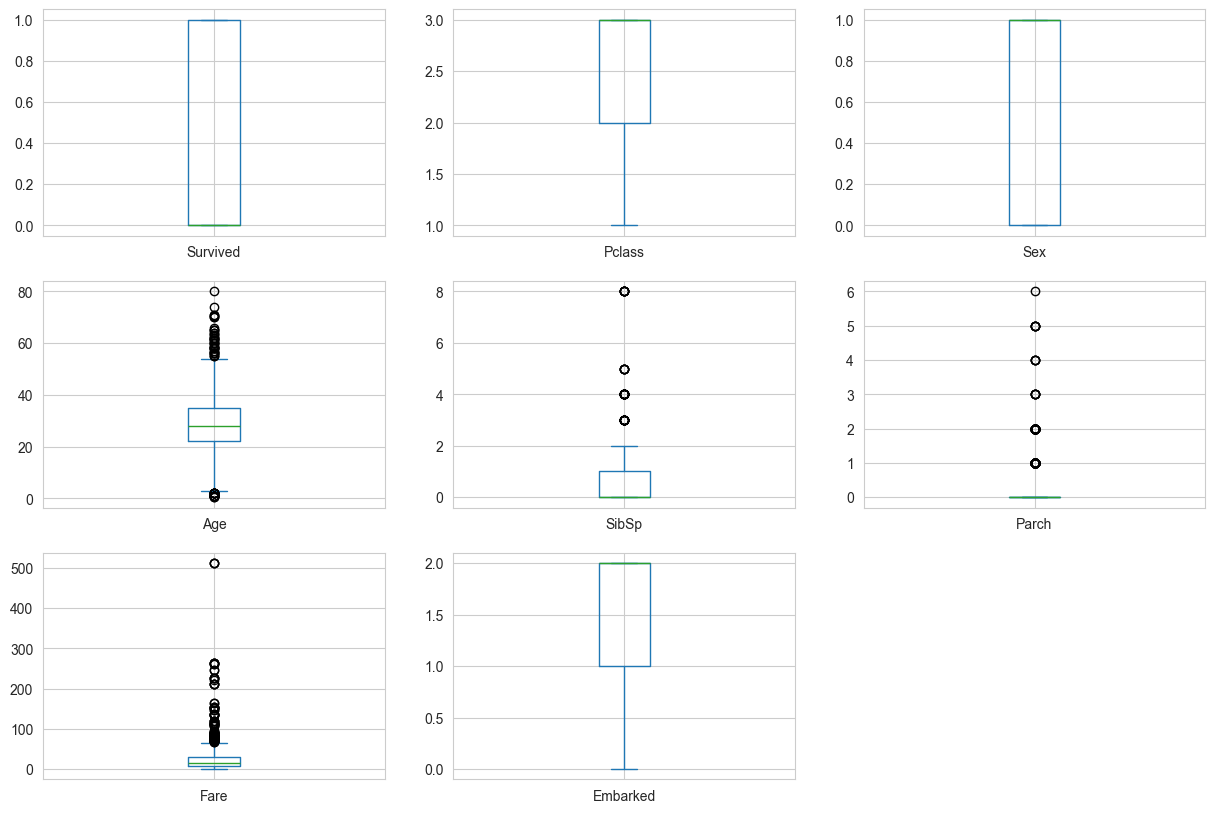

In [ ]:
train_df.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15,10));
plt.show()

**Nhận xét:**
- Boxplot giúp nhận diện các giá trị ngoại lai và phân bố của từng thuộc tính số.
- Các thuộc tính có phân bố khá đều, không có outlier quá lớn.

### 4.5 Histogram cho các thuộc tính số

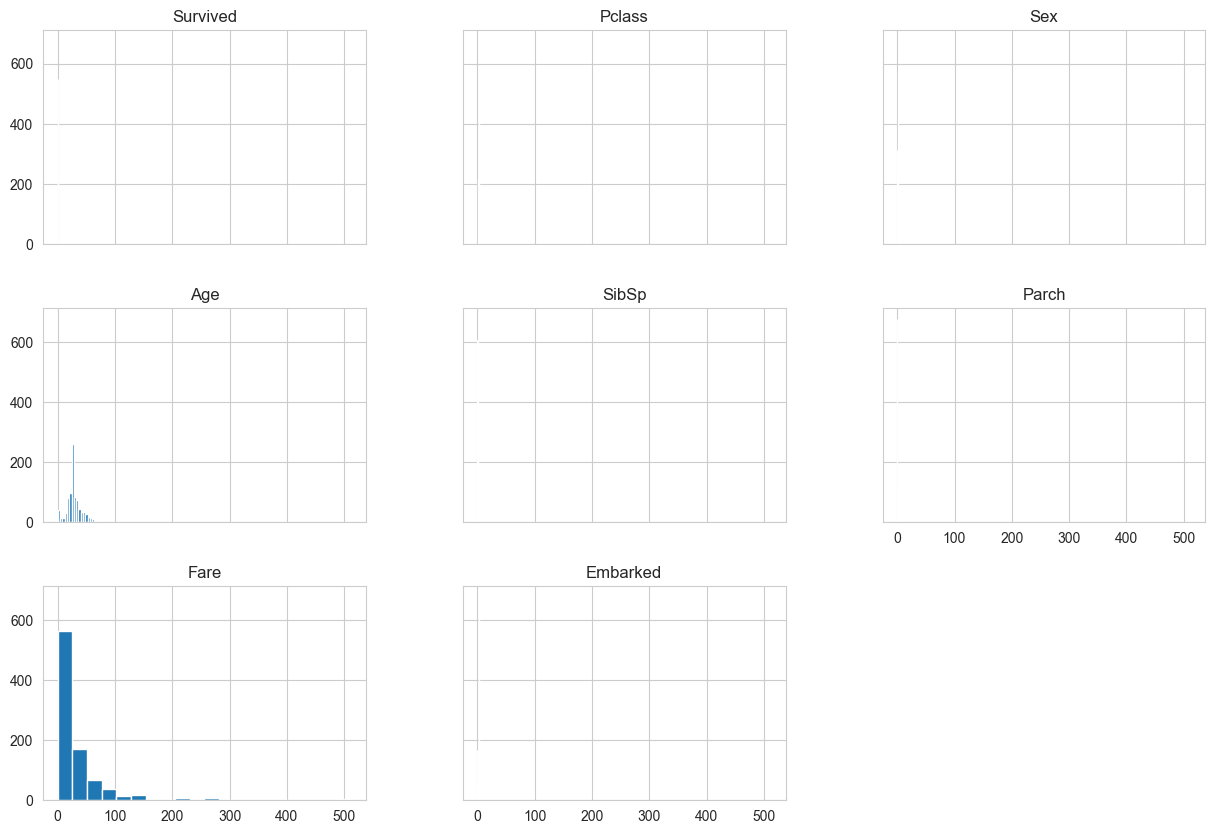

In [ ]:
train_df.hist(figsize=(15,10), bins=20, sharex=True, sharey=True);
plt.show()

**Nhận xét:**
- Histogram cho thấy phân bố dữ liệu của từng thuộc tính, giúp kiểm tra tính cân bằng và xu hướng lệch của dữ liệu.
- Đa số các thuộc tính có phân bố gần chuẩn, thuận lợi cho các thuật toán phân loại.

## 5. Tiền xử lý dữ liệu (Data Preprocessing)

### 5.1. Xử lý giá trị bị thiếu

#### Điền giá trị bị thiếu

In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

#### Xóa cột không cần thiết

In [ ]:
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'FamilySize'], axis=1)
test_passenger_id = test_df['PassengerId']
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

Đoạn code trên dùng để xử lý dữ liệu trước khi huấn luyện mô hình:

+ Điền giá trị thiếu cho các cột Age, Embarked, Fare bằng trung vị hoặc giá trị phổ biến nhất.

+ Xóa các cột không cần thiết như Cabin, Ticket, Name, PassengerId, FamilySize để tránh nhiễu dữ liệu.

+ Lưu lại PassengerId của tập test để dùng khi có kết quả dự đoán.

→ Giúp dữ liệu sạch, đồng nhất giữa train và test, sẵn sàng cho bước modeling.

### 5.2. Mã hóa dữ liệu dạng chữ (Categorical Encoding)

In [ ]:
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le.transform(test_df['Embarked'])

Đoạn code này mã hóa dữ liệu chữ thành số để mô hình học được:

+ Dùng LabelEncoder biến cột Sex và Embarked từ chuỗi (như "male", "female", "S", "C", "Q") → thành số (0, 1, 2...).

+ fit_transform() dùng cho train, còn transform() dùng cho test để giữ cùng cách mã hóa.

### 5.3. Chọn các cột đặc trưng phù hợp để đưa vào mô hình.

In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

### 5.4. Tách tập huấn luyện và kiểm định.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Lệnh này chia dữ liệu thành 2 phần:

+ X_train, y_train: dùng để huấn luyện mô hình (80% dữ liệu).

+ X_val, y_val: dùng để kiểm tra, đánh giá mô hình (20% dữ liệu).

test_size=0.2 nghĩa là 20% dữ liệu được dùng để kiểm tra (validation), còn 80% còn lại dùng để huấn luyện mô hình.

Tham số random_state=42 giúp việc chia dữ liệu được lặp lại giống nhau mỗi lần chạy.

## 6. Xây dựng mô hình (Modeling)

### 6.1. Huấn luyện mô hình Random Forest.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Dòng này:

+ Tạo mô hình Random Forest với 100 cây quyết định (n_estimators=100) và thiết lập random_state=42 để kết quả có thể lặp lại.

+ Huấn luyện mô hình bằng dữ liệu huấn luyện X_train và nhãn y_train.

### 6.2. Đánh giá mô hình.

In [ ]:
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)
f1 = f1_score(y_val, y_pred)
print(f"Độ chính xác trên tập validation: {acc:.2f}")
print(f"ROC AUC trên tập validation: {roc_auc:.2f}")
print(f"F1 Score trên tập validation: {f1:.2f}")

Độ chính xác trên tập validation: 0.82
ROC AUC trên tập validation: 0.90
F1 Score trên tập validation: 0.77


Nhận xét về kết quả đánh giá mô hình:

+ Độ chính xác (Accuracy = 0.82): Mô hình dự đoán đúng 82% tổng số mẫu — đây là mức khá tốt cho bài toán Titanic.

+ ROC AUC = 0.90: Cho thấy mô hình phân biệt rất tốt giữa hai lớp (sống sót và không sống sót), chứng tỏ khả năng phân loại mạnh.

+ F1 Score = 0.77: Điểm cân bằng giữa Precision và Recall khá cao, chứng tỏ mô hình hoạt động ổn định và không quá thiên lệch về một lớp nào.

-> Kết luận: Mô hình Random Forest có hiệu suất tốt, ổn định và đáng tin cậy trong việc dự đoán khả năng sống sót của hành khách Titanic.

## 6.3. Bểu đồ tầm quan trọng đặc trưng (Feature Importance Visualization)

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.xlabel("Độ quan trọng")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()

Dựa vào biểu đồ Feature Importance, ta thấy:

+ Giới tính (Sex) là yếu tố quan trọng nhất ảnh hưởng đến khả năng sống sót của hành khách.

+ Giá vé (Fare) và Tuổi (Age) cũng có mức ảnh hưởng lớn, cho thấy những hành khách trả giá vé cao hoặc trẻ tuổi có cơ hội sống cao hơn.

+ Hạng vé (Pclass), số anh chị em đi cùng (SibSp), số người thân (Parch) và bến đi (Embarked) có ảnh hưởng thấp hơn.

## 6.4. Biểu đồ ma trận nhầm lẫn (Confusion Matrix)

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

Dựa vào Confusion Matrix trên:

Mô hình dự đoán đúng 92 người không sống sót (True Negative) và 55 người sống sót (True Positive).

Có 13 người bị dự đoán sai là sống sót nhưng thực tế chết (False Positive).

Có 19 người bị dự đoán sai là chết nhưng thực tế sống sót (False Negative).

-> Nhận xét: Mô hình phân loại khá tốt, với phần lớn dự đoán chính xác. Tuy nhiên, vẫn còn một số trường hợp dự đoán nhầm người sống sót, cho thấy mô hình có thể được cải thiện thêm bằng cách tinh chỉnh tham số hoặc thêm đặc trưng liên quan.

### 6.5. Dự đoán cho tập test

In [ ]:
test_pred = model.predict(test_df)

submission = pd.DataFrame({
    'PassengerId': test_passenger_id,
    'Survived': test_pred
})

### 6.6. Kết quả dự đoán trên tập test

In [ ]:
submission['Survived'].value_counts()

Survived
0    264
1    154
Name: count, dtype: int64

Kết quả dự đoán cho tập test cho thấy:

+ 264 hành khách (≈63%) được mô hình dự đoán không sống sót (0).

+ 154 hành khách (≈37%) được dự đoán sống sót (1).